## **EMA (Exponential Moving Average) and SMA (Simple Moving Average):**

   - *__Purpose__*: EMAs and SMAs smooth out price data to identify trends.
   - *__Activation and Usage__*: Use the `talib.EMA` and `talib.SMA` functions in Python to calculate moving averages.
   - *__Strategy__*: Moving average crossovers (e.g., short-term crossing above long-term) can signal potential trend changes.
   - *__Key Points__*: Pay attention to how price interacts with moving averages. Golden and death crosses are common crossover patterns.
   - *__Effective Conditions__*: EMAs and SMAs are used in trend-following strategies and to confirm trends.

In [6]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
print(talib.EMA.__doc__)
print(talib.SMA.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 EMA(real[, timeperiod=?])

    Exponential Moving Average (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 30
    Outputs:
        real
    
 SMA(real[, timeperiod=?])

    Simple Moving Average (Overlap Studies)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 30
    Outputs:
        real
    


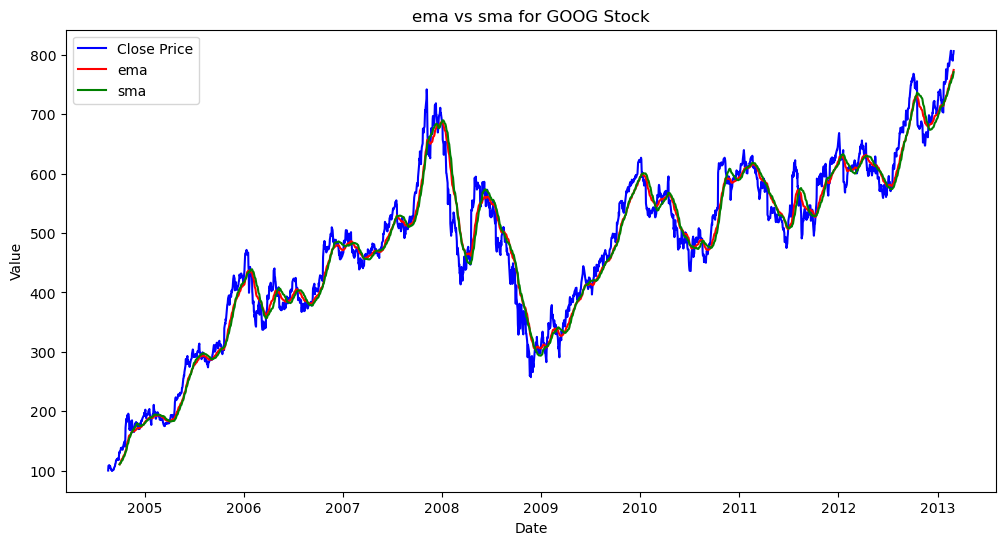

In [3]:
close_prices = GOOG['Close']

ema_timeperiod = 30
sma_timeperiod = 30

# Calculate the MACD, MACD Signal, and MACD Histogram
ema = talib.EMA(close_prices, timeperiod=ema_timeperiod)
sma = talib.SMA(close_prices, timeperiod=sma_timeperiod)
# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, ema, label='ema', color='red')
plt.plot(GOOG.index, sma, label='sma', color='green')


# Add legend
plt.legend()

# Add title and labels
plt.title('ema vs sma for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [5]:
def optim_func(series):
    if series['# Trades'] < 15:
        return -1
    
    return  series['Equity Final [$]'] * 0.2 + series['Profit Factor'] *  series['Win Rate [%]'] 

class EmaAndSmaOscillator(Strategy):
    ema_timeperiod = 30
    sma_timeperiod = 30

    def init(self):
        self.ema = self.I(talib.EMA, self.data.Close, self.ema_timeperiod)
        self.sma = self.I(talib.SMA, self.data.Close, self.sma_timeperiod)

    def next(self):
        if self.data.Close[-1] > self.ema[-1] and self.data.Close[-1] > self.sma[-1]:
            if not self.position:
                self.buy()
        elif self.data.Close[-1] < self.ema[-1] and self.data.Close[-1] < self.sma[-1]:
            if self.position:
                self.position.close()


bt = Backtest(GOOG, EmaAndSmaOscillator, cash= 10_000)
stats = bt.run()
print (stats)

stats = bt.optimize(
    ema_timeperiod = range(2, 30, 4),
    sma_timeperiod = range(2, 30, 4),
    maximize= optim_func,
    max_tries=100)
bt.plot()
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   60.986965
Equity Final [$]                     60467.26
Equity Peak [$]                      61146.01
Return [%]                           504.6726
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   23.505625
Volatility (Ann.) [%]               29.385067
Sharpe Ratio                         0.799917
Sortino Ratio                        1.573424
Calmar Ratio                         0.635381
Max. Drawdown [%]                  -36.994553
Avg. Drawdown [%]                    -4.79682
Max. Drawdown Duration      748 days 00:00:00
Avg. Drawdown Duration       54 days 00:00:00
# Trades                                   64
Win Rate [%]                          39.0625
Best Trade [%]                      53.475736
Worst Trade [%]                     -8.578917
Avg. Trade [%]                    

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.871508
Equity Final [$]                     108152.7
Equity Peak [$]                     109374.45
Return [%]                            981.527
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   32.224413
Volatility (Ann.) [%]               32.587109
Sharpe Ratio                          0.98887
Sortino Ratio                        2.231626
Calmar Ratio                         1.349774
Max. Drawdown [%]                   -23.87394
Avg. Drawdown [%]                   -3.860176
Max. Drawdown Duration      525 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                   85
Win Rate [%]                        38.823529
Best Trade [%]                      57.145901
Worst Trade [%]                     -6.806156
Avg. Trade [%]                    

In [ ]:
class EmaAndSmaOscillator(Strategy):
    ema_timeperiod = 30
    sma_timeperiod = 30

    def init(self):
        self.ema = self.I(talib.EMA, self.data.Close, self.ema_timeperiod)
        self.sma = self.I(talib.SMA, self.data.Close, self.sma_timeperiod)

    def next(self):
        if self.data.Close[-1] > self.ema[-1] and self.data.Close[-1] > self.sma[-1]:
            if not self.position:
                self.buy()
        elif self.data.Close[-1] < self.ema[-1] and self.data.Close[-1] < self.sma[-1]:
            if self.position:
                self.position.close()



In [15]:
import random
from backtesting.test import GOOG


In [26]:
close_prices = GOOG['Close']
# print (close_prices)
def make_ema_sma():
    def ema_sma(ema_timeperiod, sma_timeperiod, weight):
        def res(data):
            ema = talib.EMA(data, ema_timeperiod)
            sma = talib.SMA(data, sma_timeperiod)
            
            if data[-1] > ema[-1] and data[-1] > sma[-1]:
                return weight
            elif data.Close[-1] < ema[-1] and data[-1] < sma[-1]:
                return -weight

            return 0
        return res

    ema_timeperiod = random.randrange(3, 21, 1)
    sma_timeperiod = random.randrange(3, 21, 1)
    weight = random.randrange(50, 200, 1)/100
    
    return ema_sma(ema_timeperiod, sma_timeperiod, weight)

c = make_ema_sma()         
res =c(close_prices)
print(f"make_ema_sma: {res}")


make_ema_sma: 1.14


In [27]:

def make_ema():
    def ema(t1, t2, t3, weight):
        def res(data):
            ema_low = talib.EMA(data, timeperiod=t1)
            ema_mid = talib.EMA(data, timeperiod=t2)
            ema_hight = talib.EMA(data, timeperiod=t3)
            
            if ema_hight[-1] > ema_low[-1]:
                return -weight
            elif ema_hight[-1] < ema_low[-1]:
                return weight
            elif ema_hight[-1] > ema_mid[-1]:
                return -0.5 * weight
            elif ema_mid[-1] < ema_low[-1]:
                return 0.5* weight
            return 0
        return res

    t1 = random.randrange(3, 7, 1)
    t2 = random.randrange(t1+2, 16, 1)
    t3 = random.randrange(t2+2, 28, 1)

    weight = random.randrange(50, 200, 1)/100
    return ema(t1, t2, t3, weight)

c = make_ema()         
res =c(close_prices)
print(f"makeema: {res}")


makeema: 1.31


In [29]:
def make_sma():
    def sma(t1, t2, t3, weight):
        def res(data):
            sma_low = talib.EMA(data, timeperiod=t1)
            sma_mid = talib.EMA(data, timeperiod=t2)
            sma_hight = talib.EMA(data, timeperiod=t3)
            
            if sma_hight[-1] > sma_low[-1]:
                return -weight
            elif sma_hight[-1] < sma_low[-1]:
                return weight
            elif sma_hight[-1] > sma_mid[-1]:
                return -0.5 * weight
            elif sma_mid[-1] < sma_low[-1]:
                return 0.5* weight
            return 0
        return res

    t1 = random.randrange(3, 7, 1)
    t2 = random.randrange(t1+2, 16, 1)
    t3 = random.randrange(t2+2, 28, 1)

    weight = random.randrange(50, 200, 1)/100
    return sma(t1, t2, t3, weight)

c = make_sma()         
res =c(close_prices)
print(f"make sma: {res}")

make sma: 1.54
